In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ecuación
\frac{1}{2e^4t} + 1 - \frac{1}{2e^2t}

In [4]:
# EDO en una función + condición inicial

y0 = 1

def f(y, t):
  return 2*(1-y) - np.exp(-4*t)

In [8]:
# Método de Euler

def Euler_method(f, y0, t):
  y = np.zeros(len(t))
  y[0] = y0

  for i in range(0, len(t) - 1):
    y[i+1] = y[i] + f(y[i], t[i]) * (t[i+1] - t[i])

  return y

y_Euler = Euler_method(f, y0, t)

# Método Runge-Kutta de 4to orden

def RK_method(f, y0, t):
  y = np.zeros(len(t))
  y[0] = y0

  for i in range(0, len(t)-1):
    h = t[i+1] - t[i]
    F1 = h*f(y[i], t[i])
    F2 = h*f((y[i]+F1/2), (t[i]+h/2))
    F3 = h*f((y[i]+F2/2), (t[i]+h/2))
    F4 = h*f((y[i]+F3), (t[i]+h))
    y[i+1] = y[i] + (F1+2*F2+2*F3+F4)/6

  return y

y_RK = RK_method(f, y0, t)

In [6]:
##### Independent Variable Discretization #####
points = 21
t = np.linspace(0,2,points)
##### Step Size Calculation #####
h = t[2]-t[1]

In [7]:
##### Analytical solution #####
t_ana = np.linspace(0,2,51)
y_ana = 1/(2*np.exp(4*t_ana)) + 1 - 1/(2*np.exp(2*t_ana))

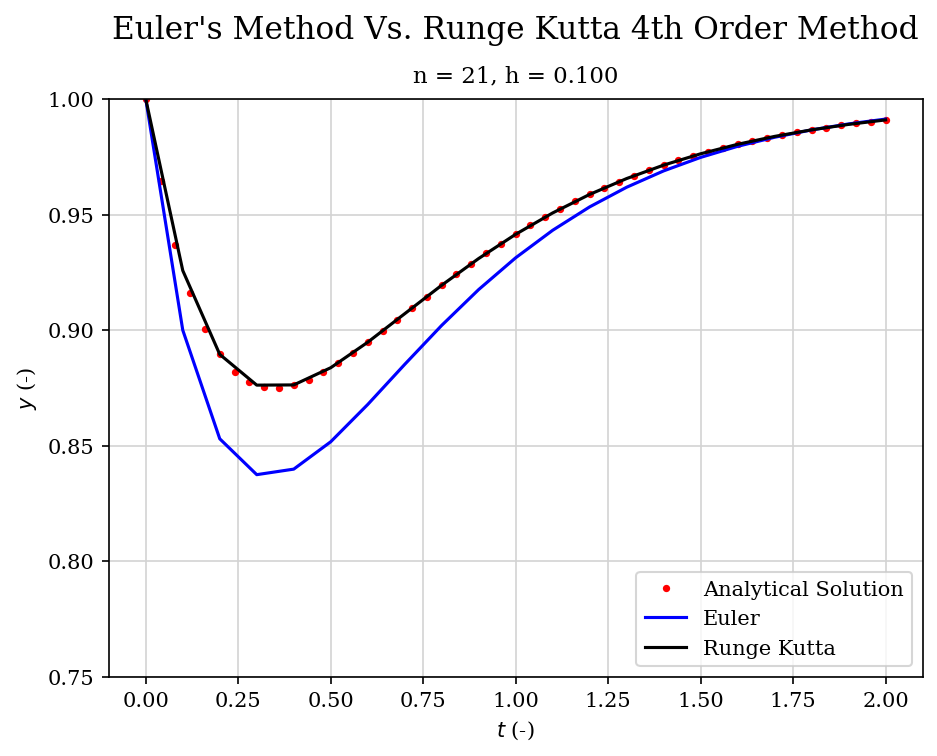

In [9]:
##### Plotting #####
plt.figure(num=1, dpi=150, figsize=(7, 5))
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']='white'
plt.plot(t_ana,y_ana,'ro',label = "Analytical Solution",markersize=2.5)
plt.plot(t,Euler_method(f,y0,t),'b-', label = "Euler")
plt.plot(t,RK_method(f,y0,t),'k-', label = "Runge Kutta")
plt.legend(loc=4)
plt.grid(True, color='lightgray')
plt.xlabel("$t$ (-)")
plt.ylabel("$y$ (-)")
plt.ylim([0.75,1])
plt.text(s='Euler\'s Method Vs. Runge Kutta 4th Order Method', x=1, y=1.03, fontsize=15, ha='center', va='center')
plt.text(s=f'n = {points}, h = {h:.3f}', x=1, y=1.01, fontsize=11, ha='center', va='center')
plt.savefig('euler_rk_output.png', transparent=False, bbox_inches="tight")
plt.show()

n = 11 31 51 71 101 201 501 1001 2001

h = 0.2 0.067 0.040 0.029 0.020 0.010 0.004 0.002 0.001